In [162]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_excel('Vertical_Flight_Efficiency_cdo_cco.xlsx','DATA')

,YEAR,MONTH_NUM,MONTH_MON,APT_ICAO,APT_NAME,STATE_NAME,NBR_FLIGHTS_DESCENT,TOT_DIST_LEVEL_NM_DESCENT,TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000,TOT_TIME_LEVEL_SECONDS_DESCENT,...,TOT_DIST_LEVEL_NM_CLIMB,TOT_DIST_LEVEL_NM_CLIMB_BELOW_10000,TOT_TIME_LEVEL_SECONDS_CLIMB,TOT_TIME_LEVEL_SECONDS_CLIMB_BELOW_10000,MEDIAN_CCO_ALT,NBR_CCO_FLIGHTS,NBR_CCO_FLIGHTS_BELOW_10000,TOT_DELTA_CO2_KG_CLIMB,TOT_DELTA_CO2_KG_CLIMB_BELOW_10000,Airport Name
1,2015,1,JAN,EBBE,Beauvechain,Belgium,7,169.688987,169.688987,4780,...,37.022418,37.022418,1140.0,1140.0,6000.000000,5.0,5.0,0.00000,0.00000,Beauvechain (EBBE)
887,2015,2,FEB,EBBE,Beauvechain,Belgium,16,311.601334,311.601334,8180,...,58.950522,58.950522,1260.0,1260.0,6000.000000,6.0,6.0,0.00000,0.00000,Beauvechain (EBBE)
1772,2015,3,MAR,EBBE,Beauvechain,Belgium,9,243.755792,243.755792,7120,...,55.893990,55.893990,1780.0,1780.0,7000.000000,5.0,5.0,0.00000,0.00000,Beauvechain (EBBE)
2711,2015,4,APR,EBBE,Beauvechain,Belgium,7,248.558149,248.558149,6760,...,10.691145,10.691145,300.0,300.0,6000.000000,7.0,7.0,0.00000,0.00000,Beauvechain (EBBE)
3663,2015,5,MAY,EBBE,Beauvechain,Belgium,6,355.620099,355.620099,8560,...,45.189885,45.189885,1260.0,1260.0,6000.000000,2.0,2.0,0.00000,0.00000,Beauvechain (EBBE)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85897,2022,7,JUL,EBBE,Beauvechain,Belgium,11,315.883009,284.619890,9840,...,20.393969,20.393969,720.0,720.0,6000.000000,11.0,11.0,5.33295,5.33295,Beauvechain (EBBE)
86899,2022,8,AUG,EBBE,Beauvechain,Belgium,4,37.268269,37.268269,1040,...,119.619484,119.619484,3860.0,3860.0,5515.727817,3.0,3.0,0.00000,0.00000,Beauvechain (EBBE)
87900,2022,9,SEP,EBBE,Beauvechain,Belgium,3,38.011160,33.211060,900,...,7.352011,0.000000,140.0,0.0,7000.000000,2.0,3.0,13.62144,0.00000,Beauvechain (EBBE)
88898,2022,10,OCT,EBBE,Beauvechain,Belgium,6,218.671298,99.579968,3780,...,2.159827,2.159827,60.0,60.0,5875.000000,3.0,3.0,0.00000,0.00000,Beauvechain (EBBE)


In [101]:
def tweak_airline(df):
    return (
        df
        .assign(DATE = pd.to_datetime(
                                    df.loc[:,'YEAR':'MONTH_NUM']
                                    .assign(DAY=1)
                                    .rename(columns={'MONTH_NUM':'MONTH'})
                                    )
               )
        .set_index('DATE')
        .drop(columns=['YEAR','MONTH_NUM','MONTH_MON','Airport Name'])
        .astype({'APT_ICAO':'category',
                'APT_NAME':'category',
                'STATE_NAME':'category'})
        .assign(Descent = lambda df_: (df_.TOT_TIME_LEVEL_SECONDS_DESCENT 
                                       / df_.NBR_FLIGHTS_DESCENT),
                Climb = lambda df_: (df_.TOT_TIME_LEVEL_SECONDS_CLIMB 
                                     / df_.NBR_FLIGHTS_CLIMB),
                Descent_below = lambda df_: (df_.TOT_TIME_LEVEL_SECONDS_DESCENT_BELOW_7000 
                                             / df_.NBR_FLIGHTS_DESCENT),
                Climb_below = lambda df_: (df_.TOT_TIME_LEVEL_SECONDS_CLIMB_BELOW_10000 
                                           / df_.NBR_FLIGHTS_CLIMB),
                pct_cdo = lambda df_: (df_.NBR_CDO_FLIGHTS 
                                       / df_.NBR_FLIGHTS_DESCENT),
                pct_cco = lambda df_: (df_.NBR_CCO_FLIGHTS 
                                       / df_.NBR_FLIGHTS_CLIMB),
                pct_cdo_below = lambda df_: (df_.NBR_CDO_FLIGHTS_BELOW_7000 
                                       / df_.NBR_FLIGHTS_DESCENT),
                pct_cco_below = lambda df_: (df_.NBR_CCO_FLIGHTS_BELOW_10000
                                       / df_.NBR_FLIGHTS_CLIMB)
                )
    )

df.info(memory_usage='deep')
cdf = tweak_airline(df)
cdf.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90796 entries, 0 to 90795
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   YEAR                                       90796 non-null  int64  
 1   MONTH_NUM                                  90796 non-null  int64  
 2   MONTH_MON                                  90796 non-null  object 
 3   APT_ICAO                                   90796 non-null  object 
 4   APT_NAME                                   90796 non-null  object 
 5   STATE_NAME                                 90796 non-null  object 
 6   NBR_FLIGHTS_DESCENT                        90796 non-null  int64  
 7   TOT_DIST_LEVEL_NM_DESCENT                  90796 non-null  float64
 8   TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000       90796 non-null  float64
 9   TOT_TIME_LEVEL_SECONDS_DESCENT             90796 non-null  int64  
 10  TOT_TIME_LEVEL_SECONDS

In [56]:
cdf

,APT_ICAO,APT_NAME,STATE_NAME,NBR_FLIGHTS_DESCENT,TOT_DIST_LEVEL_NM_DESCENT,TOT_DIST_LEVEL_NM_DESCENT_BELOW_7000,TOT_TIME_LEVEL_SECONDS_DESCENT,TOT_TIME_LEVEL_SECONDS_DESCENT_BELOW_7000,MEDIAN_CDO_ALT,NBR_CDO_FLIGHTS,...,TOT_DIST_LEVEL_NM_CLIMB,TOT_DIST_LEVEL_NM_CLIMB_BELOW_10000,TOT_TIME_LEVEL_SECONDS_CLIMB,TOT_TIME_LEVEL_SECONDS_CLIMB_BELOW_10000,MEDIAN_CCO_ALT,NBR_CCO_FLIGHTS,NBR_CCO_FLIGHTS_BELOW_10000,TOT_DELTA_CO2_KG_CLIMB,TOT_DELTA_CO2_KG_CLIMB_BELOW_10000,Descent
DATE,,,,,,,,,,,,,,,,,,,,,
2015-01-01,EBAW,Antwerpen Deurne,Belgium,343,4148.460184,2223.595073,73600,49760,3032.370103,85,...,1001.292582,261.146196,16327.0,7707.0,17000.000000,262.0,308.0,559.502401,130.283198,NaN
2015-01-01,EBBE,Beauvechain,Belgium,7,169.688987,169.688987,4780,4780,2903.333333,0,...,37.022418,37.022418,1140.0,1140.0,6000.000000,5.0,5.0,0.000000,0.000000,NaN
2015-01-01,EBBL,Kleine Brogel,Belgium,7,54.574931,20.047403,580,280,3000.000000,3,...,45.650893,0.000000,440.0,0.0,24038.333333,4.0,6.0,0.000000,0.000000,NaN
2015-01-01,EBBR,Brussels,Belgium,8207,150501.189129,24019.820435,1705480,481800,8000.000000,1891,...,30402.684644,532.468365,254281.0,7240.0,34000.000000,6213.0,8080.0,56477.198959,3380.171219,NaN
2015-01-01,EBCI,Charleroi,Belgium,1684,34298.796333,4193.082197,379940,78280,19999.444444,320,...,10355.749480,636.848862,91653.0,10808.0,37000.000000,1093.0,1553.0,16666.046934,5045.674466,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-01,UDYE,EREBUNI (MIL),Armenia,12,51.528011,9.631649,780,160,17543.518519,6,...,9.213013,0.000000,100.0,0.0,24000.000000,10.0,11.0,126.345500,0.000000,NaN
2022-11-01,UDYZ,Yerevan,Armenia,1506,9497.909602,1983.477211,117780,37100,14000.000000,517,...,5178.741224,14.208601,42000.0,180.0,34000.000000,1189.0,1499.0,6160.154983,51.075295,NaN
2022-11-01,UGKO,KUTAISI/KOPITNARI,Georgia,260,1557.439053,1061.981000,26860,21580,4212.222222,107,...,1503.954845,31.085269,13000.0,640.0,35000.000000,190.0,257.0,3110.138349,-49.133699,NaN


<AxesSubplot: xlabel='DATE'>

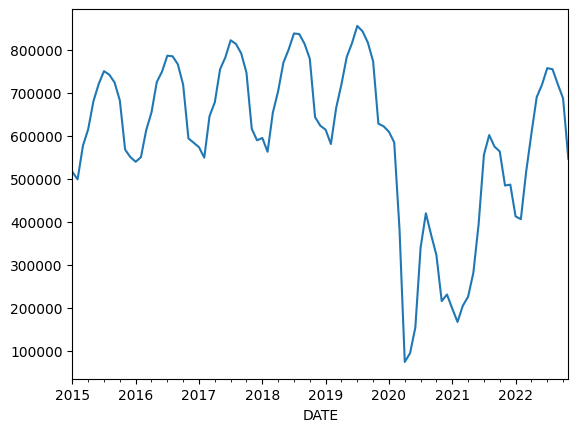

In [50]:
cdf.groupby(pd.Grouper(freq='1M')).NBR_FLIGHTS_DESCENT.sum().plot()

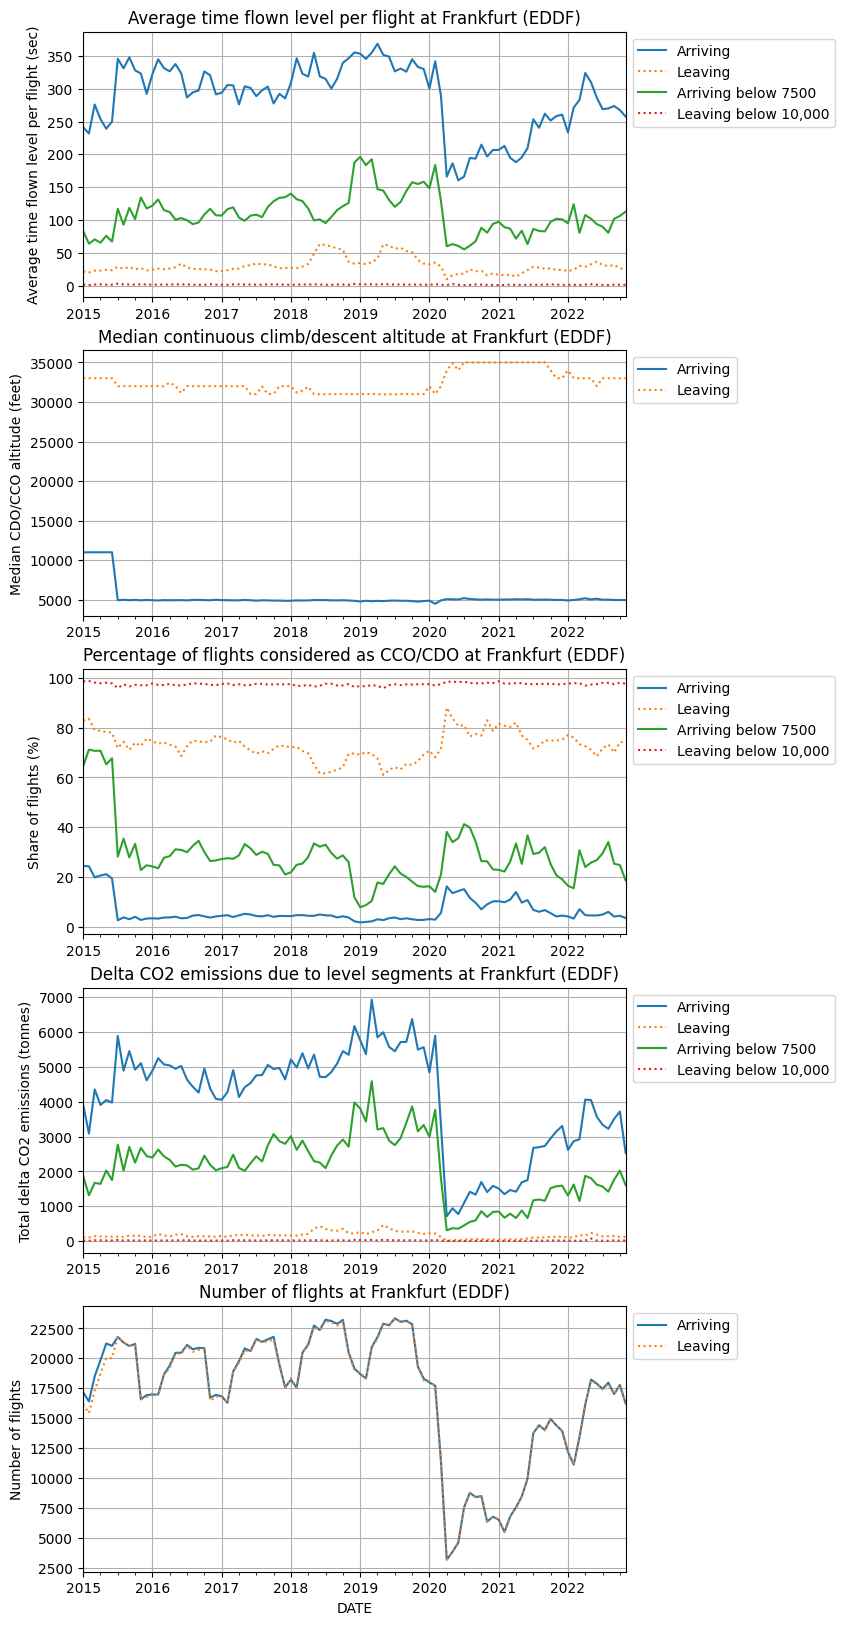

In [199]:
airport_code = "EDDF"
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(7,20))
airport = cdf.query('APT_ICAO == @airport_code')

(airport
 .loc[:,'Descent':'Climb_below']
 .plot(grid=True,
       xlabel='',
       ylabel='Average time flown level per flight (sec)',
       title=f'Average time flown level per flight at '
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':','-',':'],
       ax=ax1
      )
)
ax1.legend(['Arriving', 'Leaving',
            'Arriving below 7500', 'Leaving below 10,000'],
           loc='upper left',bbox_to_anchor=(1, 1))

(airport
 .loc[:,['MEDIAN_CDO_ALT','MEDIAN_CCO_ALT']]
 .plot(grid=True,
       xlabel='',
       ylabel='Median CDO/CCO altitude (feet)',
       title=f'Median continuous climb/descent altitude at '
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':'],
       ax=ax2
      )
)
ax2.legend(['Arriving', 'Leaving'],loc='upper left',bbox_to_anchor=(1, 1))

(airport
 .loc[:,'pct_cdo':'pct_cco_below']
 .mul(100)
 .plot(grid=True,
       xlabel='',
       ylabel='Share of flights (%)',
       title=f'Percentage of flights considered as CCO/CDO at ' \
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':','-',':'],
       ax=ax3
      )
)
ax3.legend(['Arriving', 'Leaving',
            'Arriving below 7500', 'Leaving below 10,000'],
           loc='upper left',bbox_to_anchor=(1, 1))

(airport
 .loc[:,['TOT_DELTA_CO2_KG_DESCENT','TOT_DELTA_CO2_KG_CLIMB',
         'TOT_DELTA_CO2_KG_DESCENT_BELOW_7000','TOT_DELTA_CO2_KG_CLIMB_BELOW_10000']]
 .div(1000)
 .plot(grid=True,
       xlabel='',
       ylabel='Total delta CO2 emissions (tonnes)',
       title=f'Delta CO2 emissions due to level segments at ' \
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':','-',':'],
       ax=ax4
      )
)
ax4.legend(['Arriving', 'Leaving',
            'Arriving below 7500', 'Leaving below 10,000'],
           loc='upper left',bbox_to_anchor=(1, 1))

(airport
 .loc[:,['NBR_FLIGHTS_DESCENT','NBR_FLIGHTS_CLIMB']]
 .plot(grid=True,
       ylabel='Number of flights',
       title=f'Number of flights at '\
       f'{airport.APT_NAME.iloc[0]} ({airport.APT_ICAO.iloc[0]})',
       style=['-',':'],
       ax=ax5,
       
      )
)
_=ax5.legend(['Arriving', 'Leaving'],loc='upper left',bbox_to_anchor=(1, 1))